In [1]:
# importing in built packages

import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read Data

In [2]:
df = pd.read_csv('data.csv')

### Data Exploration

In [62]:
df.head(10)

,OBJECTID,STATION_NUMBER,STATION_TEXT,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,BIKE_COUNT,BIKE_YEAR_COUNTED,STATUS,STREET_NAME,CHRIS_NUMB,PAVETYPE,FUNCTIONAL_CLASS,TrafficStationID
0,922931,277,277,14863,2022,159.0,2018.0,Active Station,SOUTH BOULDER RD,6003.0,Concrete,Principal Arterial,2925074
1,922932,279,279,10548,2022,150.0,2018.0,Active Station,SOUTH BOULDER RD,6002.0,Concrete,Principal Arterial,2925076
2,922933,281,281,9973,2022,171.0,2016.0,Active Station,SOUTH BOULDER RD,6002.0,Concrete,Principal Arterial,2925081
3,922935,145,145,1295,2022,101.0,2022.0,Active Station,NEVA RD,3401.0,Asphalt,Collector,2925199
4,922940,127,127,622,2022,13.0,2020.0,Active Station,FAIRWAYS DR,426606.0,Asphalt,Residential Collector,2925333
5,922950,469,469,206,2022,NaN,NaN,Active Station,CR 83,8300.0,Gravel,Local,2925376
6,922969,607,607,1070,2020,3.0,2020.0,Active Station,KENOSHA RD,3806.0,Asphalt,Collector,2925393
7,922970,199,199,930,2020,40.0,2020.0,Active Station,N 109TH ST,NaN,Asphalt,Local,2925309
8,922971,608,608,5040,2020,25.0,2020.0,Active Station,ARAPAHOE RD,5402.0,Asphalt,Minor Arterial,2925394
9,922972,252,252,6625,2022,100.0,2020.0,Active Station,N 95TH ST,1906.0,Asphalt,Minor Arterial,2925095


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              329 non-null    int64  
 1   STATION_NUMBER        329 non-null    int64  
 2   STATION_TEXT          329 non-null    int64  
 3   TRAFFIC_COUNT         329 non-null    int64  
 4   TRAFFIC_YEAR_COUNTED  329 non-null    int64  
 5   BIKE_COUNT            251 non-null    float64
 6   BIKE_YEAR_COUNTED     251 non-null    float64
 7   STATUS                329 non-null    object 
 8   STREET_NAME           329 non-null    object 
 9   CHRIS_NUMB            324 non-null    float64
 10  PAVETYPE              326 non-null    object 
 11  FUNCTIONAL_CLASS      324 non-null    object 
 12  TrafficStationID      329 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 33.5+ KB


In [4]:
df.shape

(329, 13)

In [6]:
df.describe()

,OBJECTID,STATION_NUMBER,STATION_TEXT,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,BIKE_COUNT,BIKE_YEAR_COUNTED,CHRIS_NUMB,TrafficStationID
count,329.000000,329.000000,329.000000,329.000000,329.000000,251.000000,251.000000,324.000000,3.290000e+02
mean,923147.452888,285.620061,285.620061,2134.556231,2021.258359,63.338645,2019.820717,45016.527778,2.925216e+06
std,110.334435,181.384038,181.384038,2626.777621,1.013686,65.155881,2.006920,145374.201992,2.072660e+02
min,922931.000000,1.000000,1.000000,30.000000,2013.000000,1.000000,2013.000000,80.000000,2.925001e+06
25%,923055.000000,128.000000,128.000000,250.000000,2021.000000,14.500000,2020.000000,2604.000000,2.925093e+06
50%,923145.000000,266.000000,266.000000,832.000000,2022.000000,43.000000,2020.000000,4403.500000,2.925184e+06
75%,923238.000000,432.000000,432.000000,3340.000000,2022.000000,92.000000,2021.000000,9402.000000,2.925281e+06
max,923342.000000,908.000000,908.000000,14863.000000,2022.000000,409.000000,2022.000000,890805.000000,2.926205e+06


In [5]:
df.columns

Index(['OBJECTID', 'STATION_NUMBER', 'STATION_TEXT', 'TRAFFIC_COUNT',
       'TRAFFIC_YEAR_COUNTED', 'BIKE_COUNT', 'BIKE_YEAR_COUNTED', 'STATUS',
       'STREET_NAME', 'CHRIS_NUMB', 'PAVETYPE', 'FUNCTIONAL_CLASS',
       'TrafficStationID '],
      dtype='object')

In [7]:
df_new = df.drop(columns = ['OBJECTID','STATION_TEXT', 'BIKE_COUNT', 'BIKE_YEAR_COUNTED', 'TrafficStationID '])

In [8]:
df_new.shape

(329, 8)

### Missing Value Treatment 

In [9]:
df_new.isnull().sum()

STATION_NUMBER          0
TRAFFIC_COUNT           0
TRAFFIC_YEAR_COUNTED    0
STATUS                  0
STREET_NAME             0
CHRIS_NUMB              5
PAVETYPE                3
FUNCTIONAL_CLASS        5
dtype: int64

In [10]:
df_new.dtypes

STATION_NUMBER            int64
TRAFFIC_COUNT             int64
TRAFFIC_YEAR_COUNTED      int64
STATUS                   object
STREET_NAME              object
CHRIS_NUMB              float64
PAVETYPE                 object
FUNCTIONAL_CLASS         object
dtype: object

In [11]:
# Calculate the mean of the column
mean_value_CHRIS_NUMB = df_new['CHRIS_NUMB'].mean()

df_new['CHRIS_NUMB'].fillna(mean_value_CHRIS_NUMB, inplace=True)

In [12]:
# Convert 'FloatColumn' to integers
df_new['CHRIS_NUMB'] = df_new['CHRIS_NUMB'].astype(int)
df_new['STATUS'] = df_new['STATUS'].astype(str)
df_new['STREET_NAME'] = df_new['STREET_NAME'].astype(str)
df_new['PAVETYPE'] = df_new['PAVETYPE'].astype(str)
df_new['FUNCTIONAL_CLASS'] = df_new['FUNCTIONAL_CLASS'].astype(str)

In [13]:
df_new.isnull().sum()

STATION_NUMBER          0
TRAFFIC_COUNT           0
TRAFFIC_YEAR_COUNTED    0
STATUS                  0
STREET_NAME             0
CHRIS_NUMB              0
PAVETYPE                0
FUNCTIONAL_CLASS        0
dtype: int64

In [14]:
df_new.dtypes

STATION_NUMBER           int64
TRAFFIC_COUNT            int64
TRAFFIC_YEAR_COUNTED     int64
STATUS                  object
STREET_NAME             object
CHRIS_NUMB               int64
PAVETYPE                object
FUNCTIONAL_CLASS        object
dtype: object

In [15]:
df_new.describe()

,STATION_NUMBER,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,CHRIS_NUMB
count,329.000000,329.000000,329.000000,329.000000
mean,285.620061,2134.556231,2021.258359,45016.519757
std,181.384038,2626.777621,1.013686,144261.911726
min,1.000000,30.000000,2013.000000,80.000000
25%,128.000000,250.000000,2021.000000,2605.000000
50%,266.000000,832.000000,2022.000000,4602.000000
75%,432.000000,3340.000000,2022.000000,9404.000000
max,908.000000,14863.000000,2022.000000,890805.000000


In [16]:
df_new.head()

,STATION_NUMBER,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,STATUS,STREET_NAME,CHRIS_NUMB,PAVETYPE,FUNCTIONAL_CLASS
0,277,14863,2022,Active Station,SOUTH BOULDER RD,6003,Concrete,Principal Arterial
1,279,10548,2022,Active Station,SOUTH BOULDER RD,6002,Concrete,Principal Arterial
2,281,9973,2022,Active Station,SOUTH BOULDER RD,6002,Concrete,Principal Arterial
3,145,1295,2022,Active Station,NEVA RD,3401,Asphalt,Collector
4,127,622,2022,Active Station,FAIRWAYS DR,426606,Asphalt,Residential Collector


In [17]:
df_new['PAVETYPE'].unique()

array(['Concrete', 'Asphalt', 'Gravel', 'nan'], dtype=object)

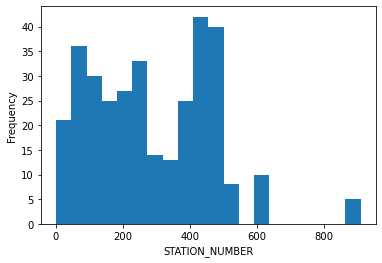

In [18]:
# Histogram for a numeric column
plt.hist(df_new['STATION_NUMBER'], bins=20)
plt.xlabel('STATION_NUMBER')
plt.ylabel('Frequency')
plt.show()

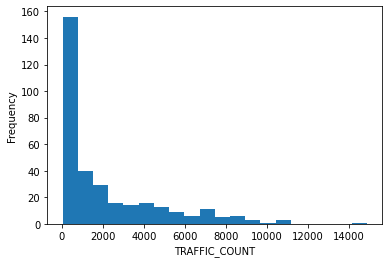

In [19]:
# Histogram for a numeric column
plt.hist(df_new['TRAFFIC_COUNT'], bins=20)
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('Frequency')
plt.show()

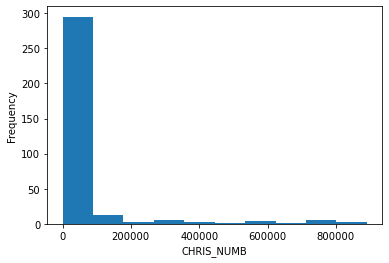

In [20]:
# Histogram for a numeric column
plt.hist(df_new['CHRIS_NUMB'])
plt.xlabel('CHRIS_NUMB')
plt.ylabel('Frequency')
plt.show()

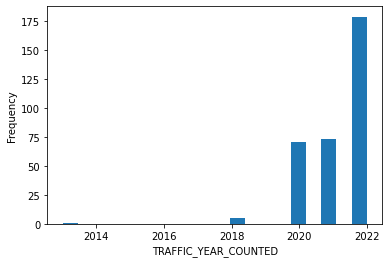

In [21]:
# Histogram for a numeric column
plt.hist(df_new['TRAFFIC_YEAR_COUNTED'], bins=20)
plt.xlabel('TRAFFIC_YEAR_COUNTED')
plt.ylabel('Frequency')
plt.show()

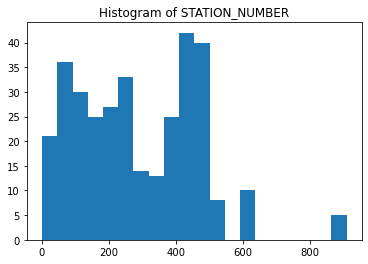

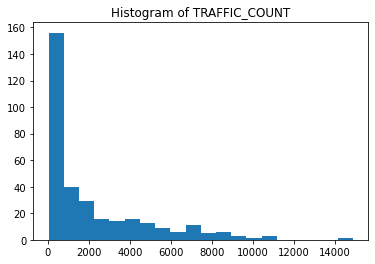

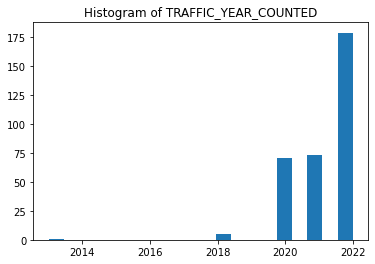

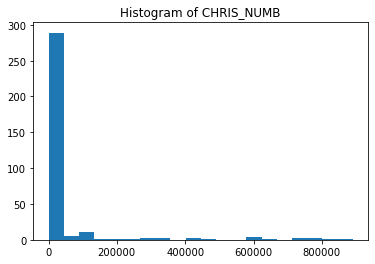

In [22]:
# Assuming df is your DataFrame
for column in df_new.select_dtypes(include=['number']):
    plt.hist(df_new[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.show()

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


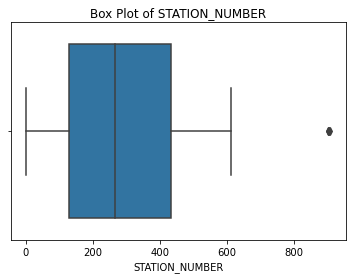

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


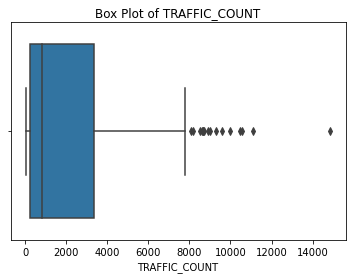

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


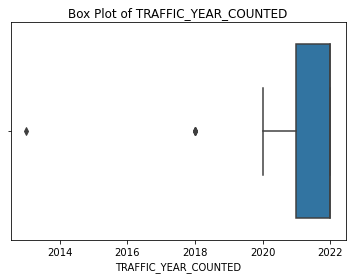

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


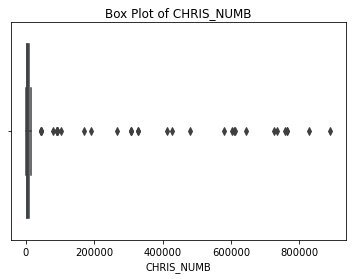

In [23]:
for column in df_new.select_dtypes(include=['number']):
    sns.boxplot(data=df_new, x=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


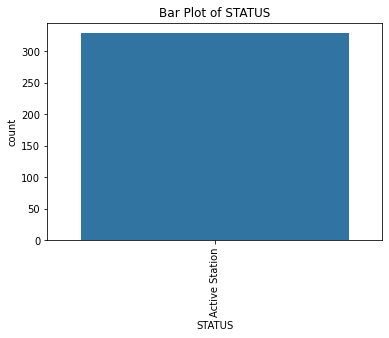

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


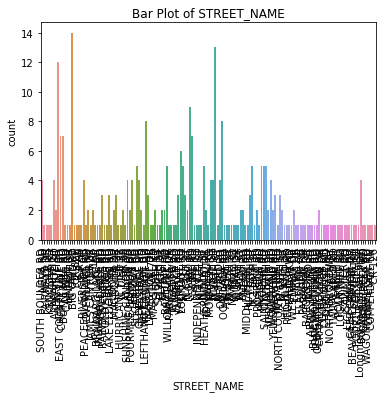

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


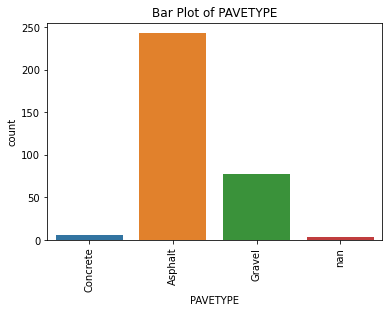

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


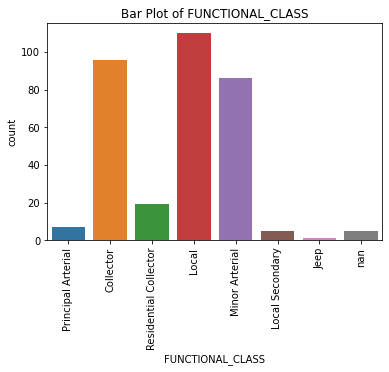

In [24]:
for column in df_new.select_dtypes(include=['object']):
    sns.countplot(data=df_new, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=90)
    plt.show()


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

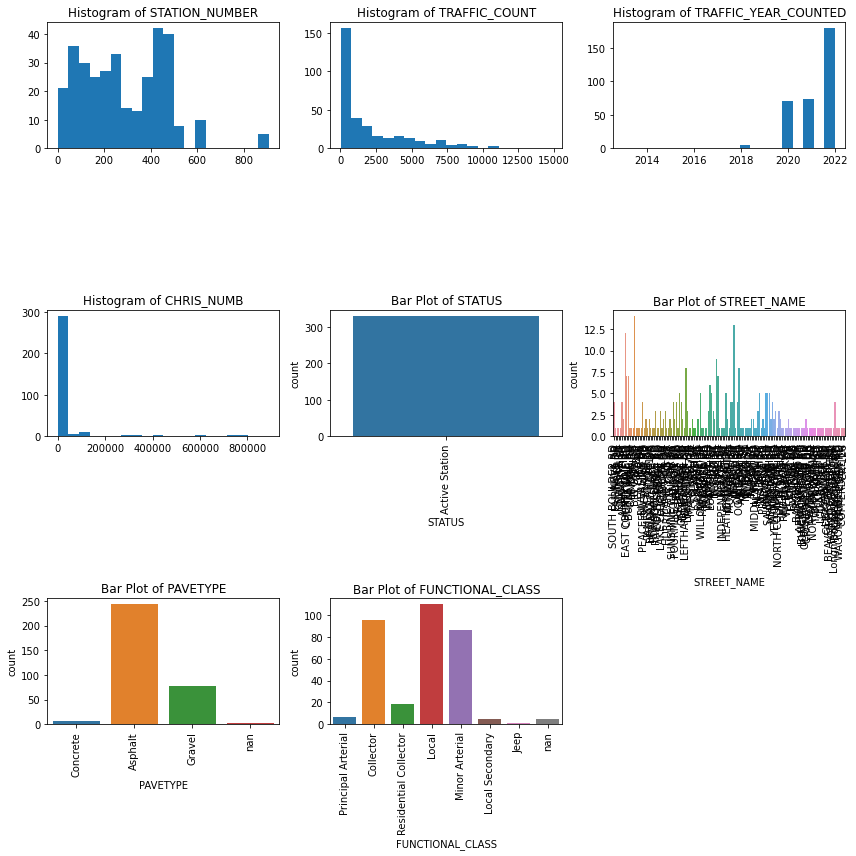

In [25]:
# Assuming df is your DataFrame
numeric_columns = df_new.select_dtypes(include=['number'])
categorical_columns = df_new.select_dtypes(include=['object'])

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot numeric columns
for i, column in enumerate(numeric_columns.columns):
    plt.sca(axes[i])
    plt.hist(df_new[column], bins=20)
    plt.title(f'Histogram of {column}')

# Plot categorical columns
for i, column in enumerate(categorical_columns.columns):
    plt.sca(axes[i + len(numeric_columns.columns)])
    sns.countplot(data=df_new, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=90)

# Hide empty subplots if there are fewer than 9 columns
for i in range(len(numeric_columns.columns) + len(categorical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Bivariate analysis

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


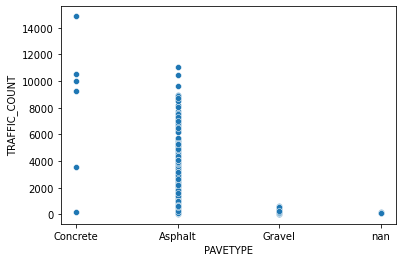

In [26]:
sns.scatterplot(x='PAVETYPE', y='TRAFFIC_COUNT', data=df_new)
plt.show()

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


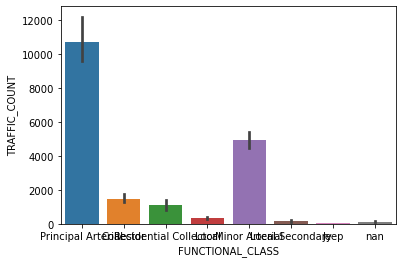

In [27]:
sns.barplot(x='FUNCTIONAL_CLASS', y='TRAFFIC_COUNT', data=df_new)
plt.show()

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


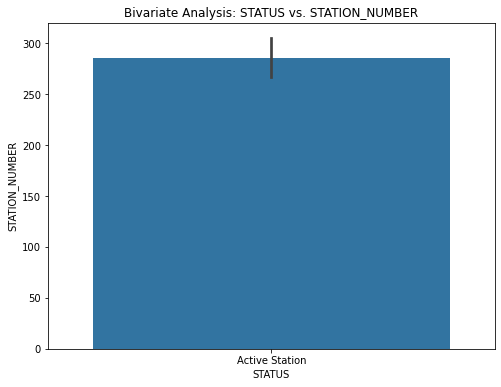

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


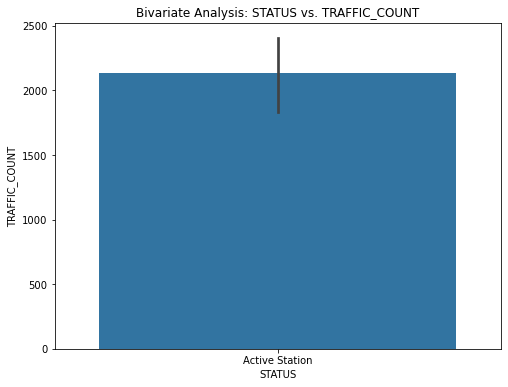

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


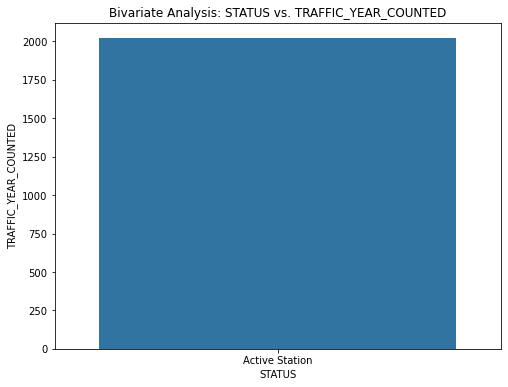

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


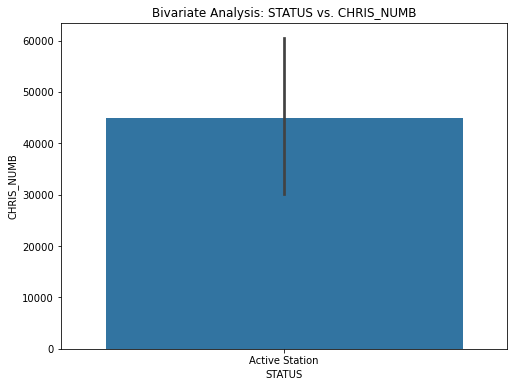

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


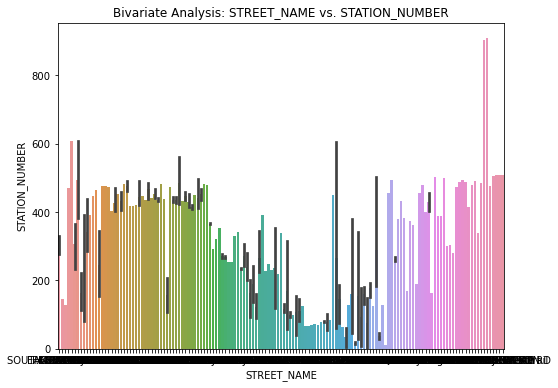

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


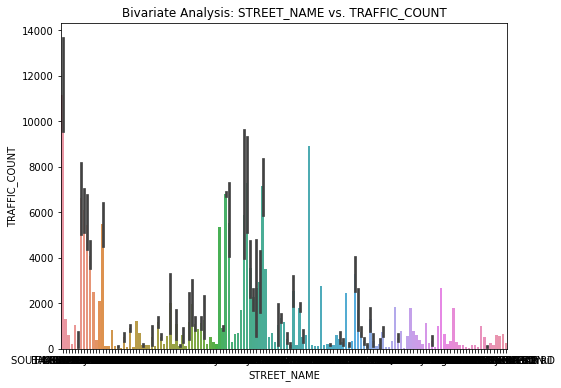

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


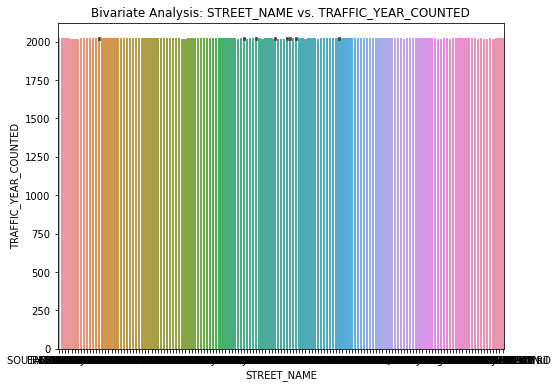

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


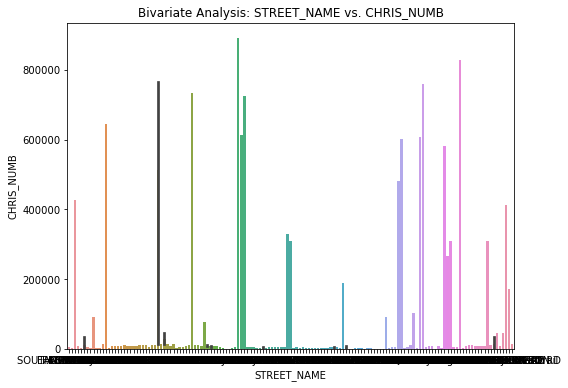

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


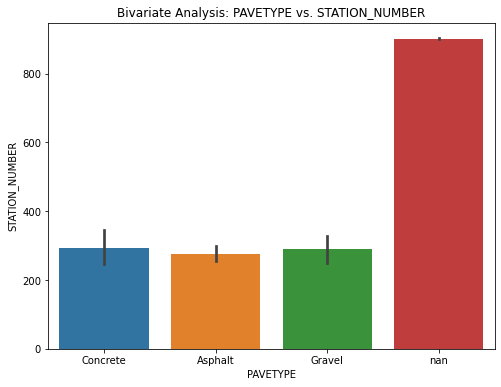

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


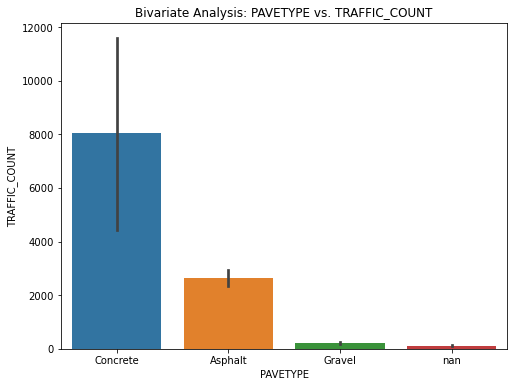

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


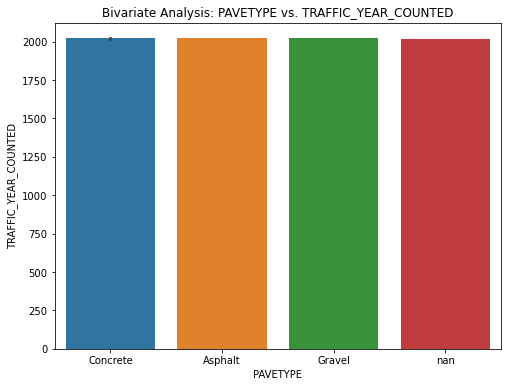

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


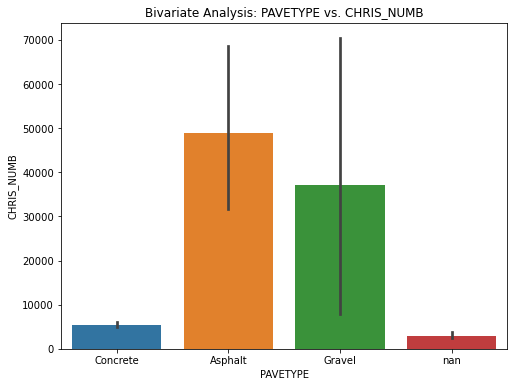

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


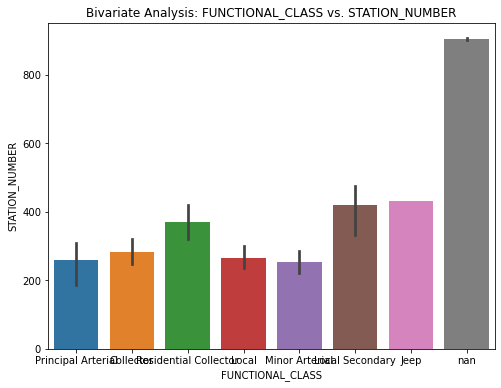

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


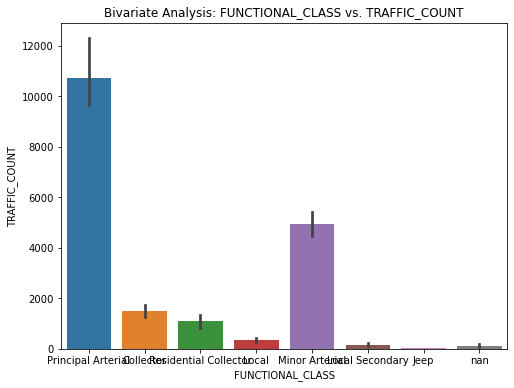

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


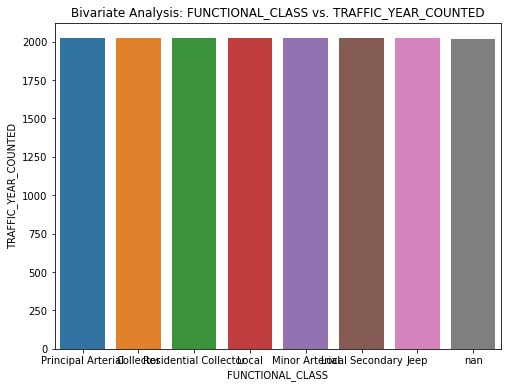

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


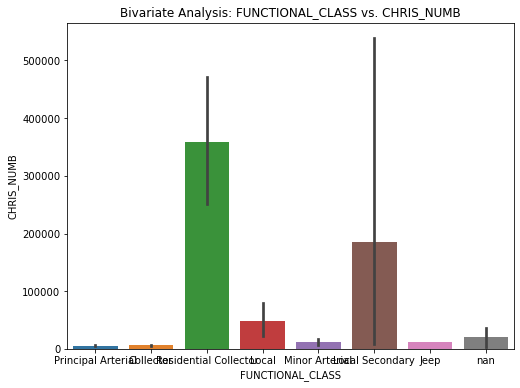

In [28]:
# Separate columns by data type
numeric_columns = df_new.select_dtypes(include=['number'])
categorical_columns = df_new.select_dtypes(include=['object'])

# Perform bivariate analysis for all combinations
for cat_column in categorical_columns.columns:
    for num_column in numeric_columns.columns:
        # Create a bar plot
        plt.figure(figsize=(8, 6))
        sns.barplot(x=cat_column, y=num_column, data=df_new)
        plt.title(f'Bivariate Analysis: {cat_column} vs. {num_column}')
        plt.show()

In [29]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_new['PAVETYPE'], df_new['FUNCTIONAL_CLASS'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 420.07192601520256
P-value: 6.456442929286408e-76


## Clustering

In [30]:
df_new.head()

,STATION_NUMBER,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,STATUS,STREET_NAME,CHRIS_NUMB,PAVETYPE,FUNCTIONAL_CLASS
0,277,14863,2022,Active Station,SOUTH BOULDER RD,6003,Concrete,Principal Arterial
1,279,10548,2022,Active Station,SOUTH BOULDER RD,6002,Concrete,Principal Arterial
2,281,9973,2022,Active Station,SOUTH BOULDER RD,6002,Concrete,Principal Arterial
3,145,1295,2022,Active Station,NEVA RD,3401,Asphalt,Collector
4,127,622,2022,Active Station,FAIRWAYS DR,426606,Asphalt,Residential Collector


In [69]:
# Assuming you have a DataFrame named 'df'
categorical_columns = df_new.select_dtypes(include=['object'])
categorical_columns.head()

,STATUS,STREET_NAME,PAVETYPE,FUNCTIONAL_CLASS
0,Active Station,SOUTH BOULDER RD,Concrete,Principal Arterial
1,Active Station,SOUTH BOULDER RD,Concrete,Principal Arterial
2,Active Station,SOUTH BOULDER RD,Concrete,Principal Arterial
3,Active Station,NEVA RD,Asphalt,Collector
4,Active Station,FAIRWAYS DR,Asphalt,Residential Collector


In [31]:
df_new.dtypes

STATION_NUMBER           int64
TRAFFIC_COUNT            int64
TRAFFIC_YEAR_COUNTED     int64
STATUS                  object
STREET_NAME             object
CHRIS_NUMB               int64
PAVETYPE                object
FUNCTIONAL_CLASS        object
dtype: object

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   STATION_NUMBER        329 non-null    int64 
 1   TRAFFIC_COUNT         329 non-null    int64 
 2   TRAFFIC_YEAR_COUNTED  329 non-null    int64 
 3   STATUS                329 non-null    object
 4   STREET_NAME           329 non-null    object
 5   CHRIS_NUMB            329 non-null    int64 
 6   PAVETYPE              329 non-null    object
 7   FUNCTIONAL_CLASS      329 non-null    object
dtypes: int64(4), object(4)
memory usage: 20.7+ KB


In [50]:
csv_file_path = "cleaned_data.csv"
df_new.to_csv(csv_file_path, index=False)

In [32]:
numerical_columns = df_new.select_dtypes(include=['int64', 'float64'])

In [33]:
numerical_columns.head()

,STATION_NUMBER,TRAFFIC_COUNT,TRAFFIC_YEAR_COUNTED,CHRIS_NUMB
0,277,14863,2022,6003
1,279,10548,2022,6002
2,281,9973,2022,6002
3,145,1295,2022,3401
4,127,622,2022,426606


In [34]:
numerical_columns.isnull().sum()

STATION_NUMBER          0
TRAFFIC_COUNT           0
TRAFFIC_YEAR_COUNTED    0
CHRIS_NUMB              0
dtype: int64

Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
1    185
0    144
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


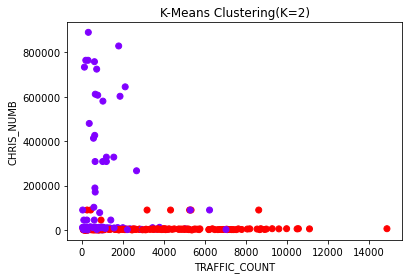

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = numerical_columnsX = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)


# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['CHRIS_NUMB'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('CHRIS_NUMB')
plt.title('K-Means Clustering(K=2)')
plt.show()

# # Print cluster assignments
# print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])

Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
0    178
1    136
2     15
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


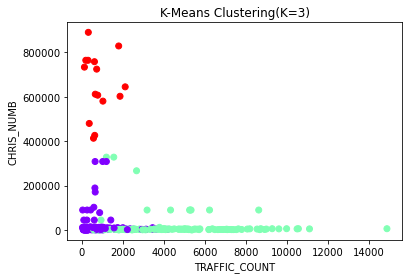

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = numerical_columnsX = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)


# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['CHRIS_NUMB'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('CHRIS_NUMB')
plt.title('K-Means Clustering(K=3)')
plt.show()

# # Print cluster assignments
# print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])

Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
3    126
0    124
1     64
2     15
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


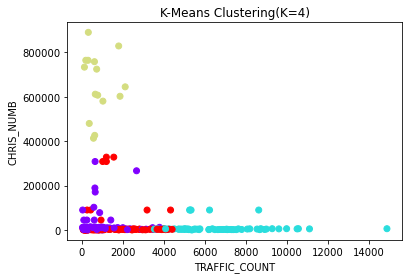

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = numerical_columnsX = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters as needed
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)


# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['CHRIS_NUMB'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('CHRIS_NUMB')
plt.title('K-Means Clustering(K=4)')
plt.show()

# # Print cluster assignments
# print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])

Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
1    185
0    144
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


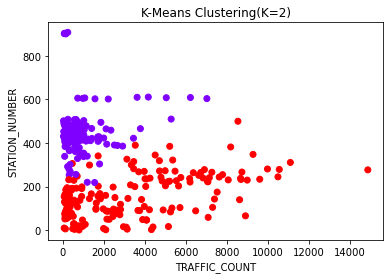

     STATION_NUMBER  TRAFFIC_COUNT  TRAFFIC_YEAR_COUNTED  CHRIS_NUMB  cluster
0               277          14863                  2022        6003        1
1               279          10548                  2022        6002        1
2               281           9973                  2022        6002        1
3               145           1295                  2022        3401        1
4               127            622                  2022      426606        0
..              ...            ...                   ...         ...      ...
324             506            600                  2020       45016        0
325             507            562                  2022      413603        0
326             508            646                  2022      171101        0
327             509            247                  2022       12601        0
328             510           5279                  2021       90101        0

[329 rows x 5 columns]


In [64]:
# Select features for clustering
X = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)

# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['STATION_NUMBER'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('STATION_NUMBER')
plt.title('K-Means Clustering(K=2)')
plt.show()

# Print cluster assignments
print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])


Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
0    178
1    136
2     15
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


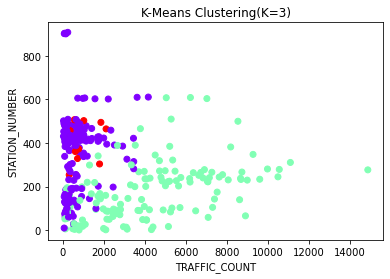

     STATION_NUMBER  TRAFFIC_COUNT  TRAFFIC_YEAR_COUNTED  CHRIS_NUMB  cluster
0               277          14863                  2022        6003        1
1               279          10548                  2022        6002        1
2               281           9973                  2022        6002        1
3               145           1295                  2022        3401        0
4               127            622                  2022      426606        2
..              ...            ...                   ...         ...      ...
324             506            600                  2020       45016        0
325             507            562                  2022      413603        2
326             508            646                  2022      171101        0
327             509            247                  2022       12601        0
328             510           5279                  2021       90101        1

[329 rows x 5 columns]


In [65]:
# Select features for clustering
X = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)

# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['STATION_NUMBER'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('STATION_NUMBER')
plt.title('K-Means Clustering(K=3)')
plt.show()

# Print cluster assignments
print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])


Dimensions of X_scaled: (329, 4)
Dimensions of df: (329, 5)
Cluster assignments: cluster
3    126
0    124
1     64
2     15
Name: count, dtype: int64


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


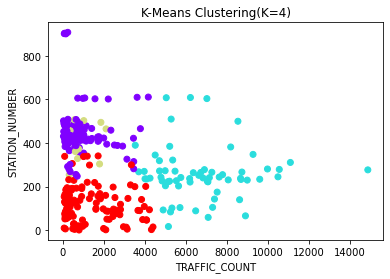

     STATION_NUMBER  TRAFFIC_COUNT  TRAFFIC_YEAR_COUNTED  CHRIS_NUMB  cluster
0               277          14863                  2022        6003        1
1               279          10548                  2022        6002        1
2               281           9973                  2022        6002        1
3               145           1295                  2022        3401        3
4               127            622                  2022      426606        2
..              ...            ...                   ...         ...      ...
324             506            600                  2020       45016        0
325             507            562                  2022      413603        2
326             508            646                  2022      171101        0
327             509            247                  2022       12601        0
328             510           5279                  2021       90101        1

[329 rows x 5 columns]


In [66]:
# Select features for clustering
X = numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
numerical_columns['cluster'] = kmeans.fit_predict(X_scaled)

# Check the dimensions and data
print("Dimensions of X_scaled:", X_scaled.shape)
print("Dimensions of df:", numerical_columns.shape)
print("Cluster assignments:", numerical_columns['cluster'].value_counts())

# Visualize the results
plt.scatter(numerical_columns['TRAFFIC_COUNT'], numerical_columns['STATION_NUMBER'], c=numerical_columns['cluster'], cmap='rainbow')
plt.xlabel('TRAFFIC_COUNT')
plt.ylabel('STATION_NUMBER')
plt.title('K-Means Clustering(K=4)')
plt.show()

# Print cluster assignments
print(numerical_columns[['STATION_NUMBER', 'TRAFFIC_COUNT', 'TRAFFIC_YEAR_COUNTED', 'CHRIS_NUMB', 'cluster']])
